In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")

In [ ]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Output:

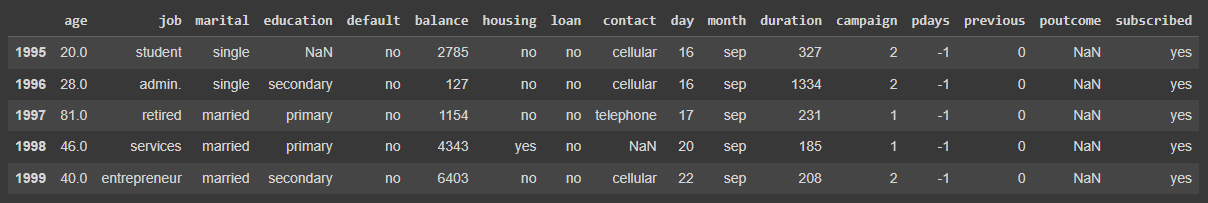

In [ ]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Output:

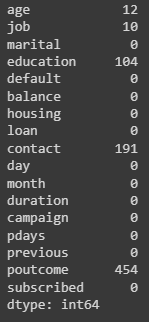

In [ ]:
df_original = df

In [ ]:
df = pd.get_dummies(df, columns=['job', 'education', 'contact', 'poutcome'],
                        dummy_na=True,
                        drop_first=True)
df.tail()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_unemployed,job_nan,education_secondary,education_tertiary,education_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,no,2785,no,no,16,sep,327,2,...,0,0,0,0,1,0,0,0,0,1
1996,28.0,single,no,127,no,no,16,sep,1334,2,...,0,0,1,0,0,0,0,0,0,1
1997,81.0,married,no,1154,no,no,17,sep,231,1,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,no,4343,yes,no,20,sep,185,1,...,0,0,0,0,0,0,1,0,0,1
1999,40.0,married,no,6403,no,no,22,sep,208,2,...,0,0,1,0,0,0,0,0,0,1


Output:

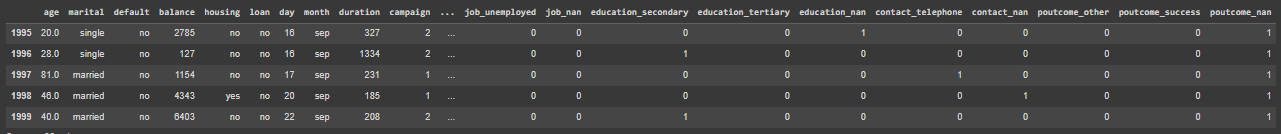

In [ ]:
df.isna().sum()

age                    12
marital                 0
default                 0
balance                 0
housing                 0
loan                    0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
subscribed              0
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
job_nan                 0
education_secondary     0
education_tertiary      0
education_nan           0
contact_telephone       0
contact_nan             0
poutcome_other          0
poutcome_success        0
poutcome_nan            0
dtype: int64

Output:

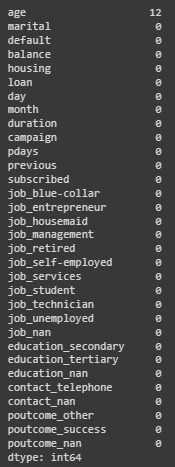

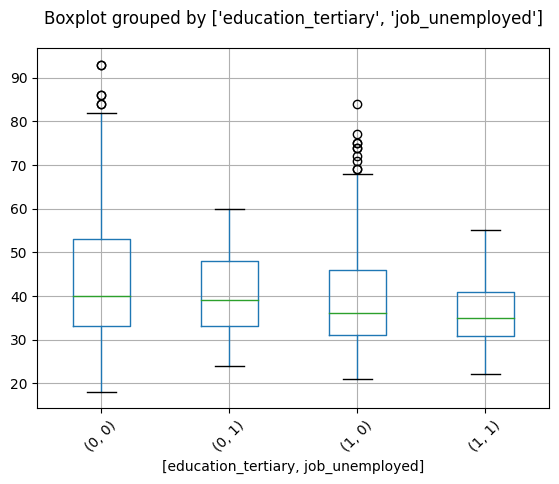

In [ ]:
df.boxplot(column='age', by=['education_tertiary','job_unemployed'], rot=45)
plt.title("")
plt.show()

Output:

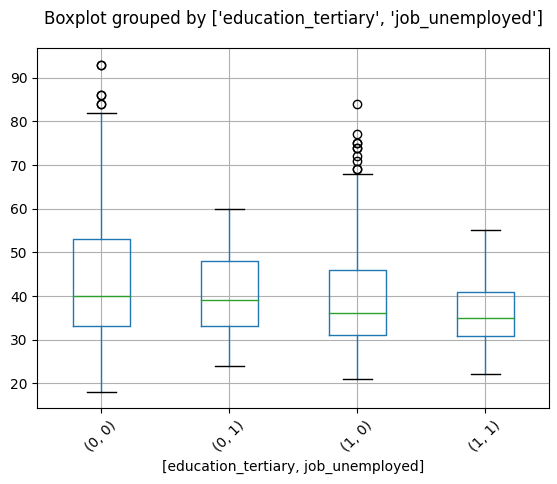

In [ ]:
ptable = df.pivot_table(values='age',
                        index='education_tertiary',
                        columns='job_unemployed',
                        aggfunc=np.median)
ptable

job_unemployed,0,1
education_tertiary,,
0,40.0,39.0
1,36.0,35.0


Output:

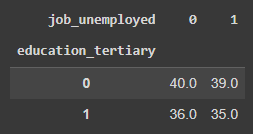

In [ ]:
def get_element(x):
    return ptable.loc[x['education_tertiary'], x['job_unemployed']]

df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [ ]:
robust_scaler = RobustScaler()
df[['balance',
    'duration']] = robust_scaler.fit_transform(df[['balance',
                                                     'duration']])

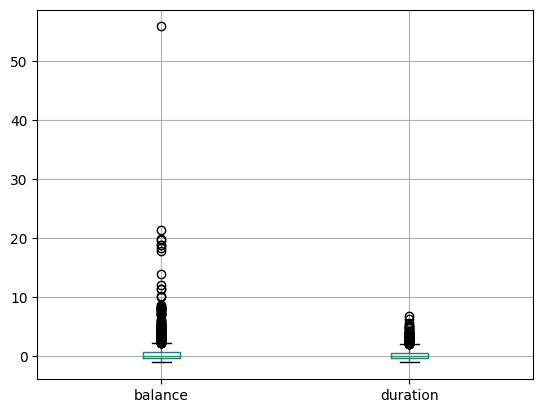

In [ ]:
df.boxplot(column=['balance','duration'])
plt.show()

Output:

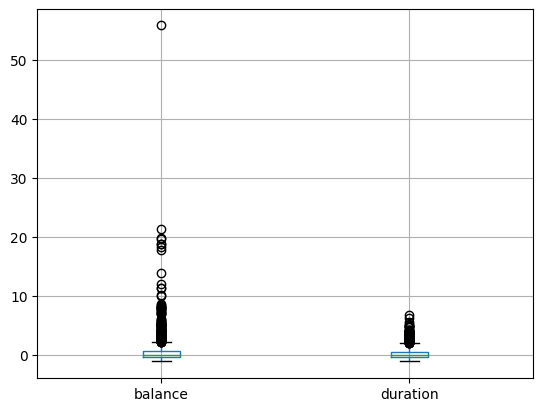

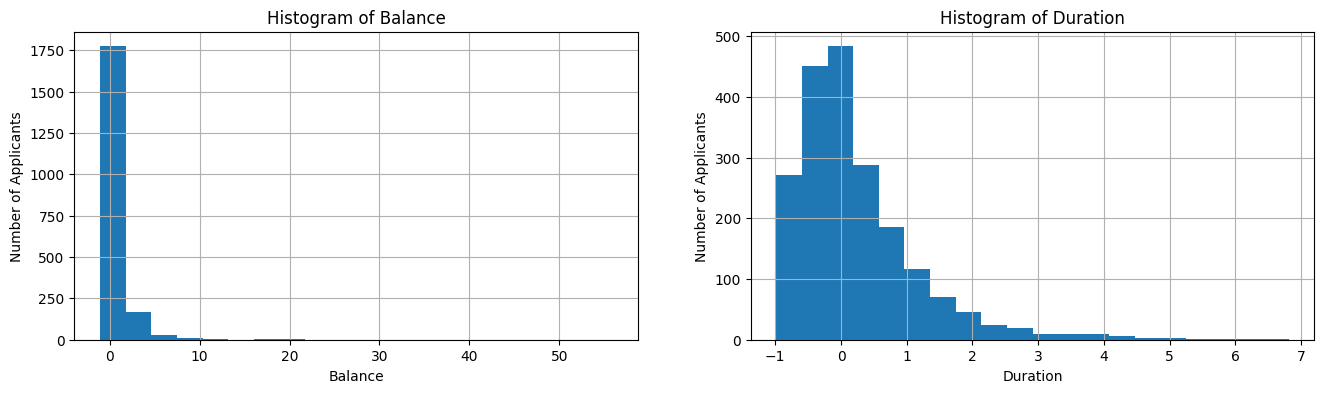

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Duration")
ax3.set_xlabel('Duration')
ax3.set_ylabel('Number of Applicants')
df['duration'].hist(bins=20)

plt.show()

Output:

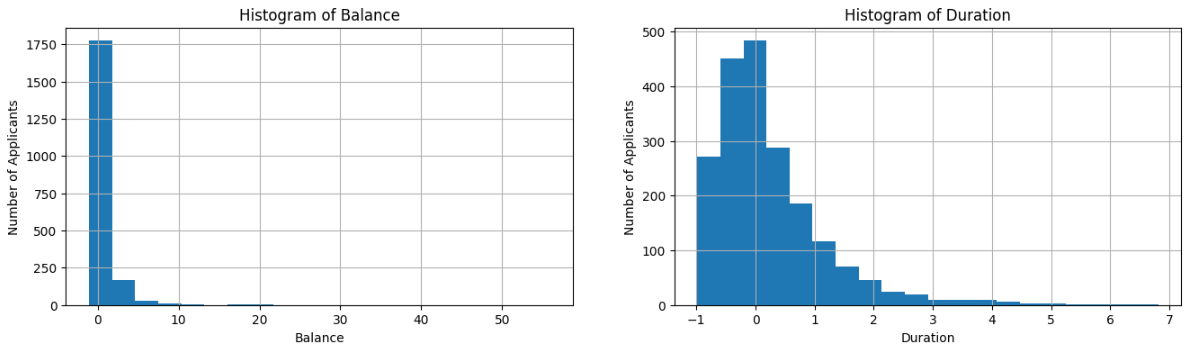

In [ ]:
df[['balance', 'duration']].min()

balance    -1.060984
duration   -0.982833
dtype: float64

Output:

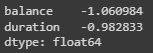

In [ ]:
df['balance'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)
df['duration'] = np.log(df['duration'] + abs(min(df['duration'])) + 1)

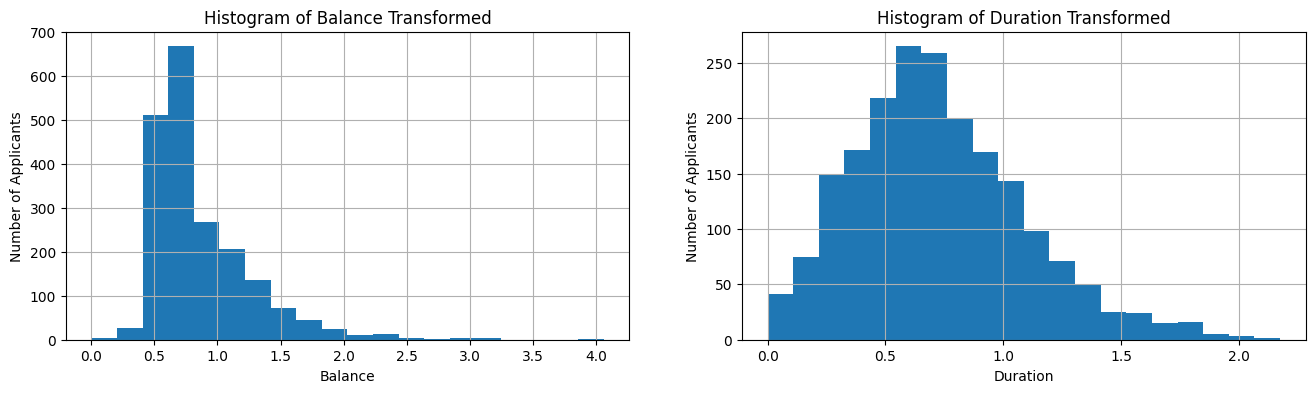

In [ ]:
fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Balance Transformed")
ax1.set_xlabel('Balance')
ax1.set_ylabel('Number of Applicants')
df['balance'].hist(bins=20)

ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Duration Transformed")
ax3.set_xlabel('Duration')
ax3.set_ylabel('Number of Applicants')
df['duration'].hist(bins=20)

plt.show()

Output:

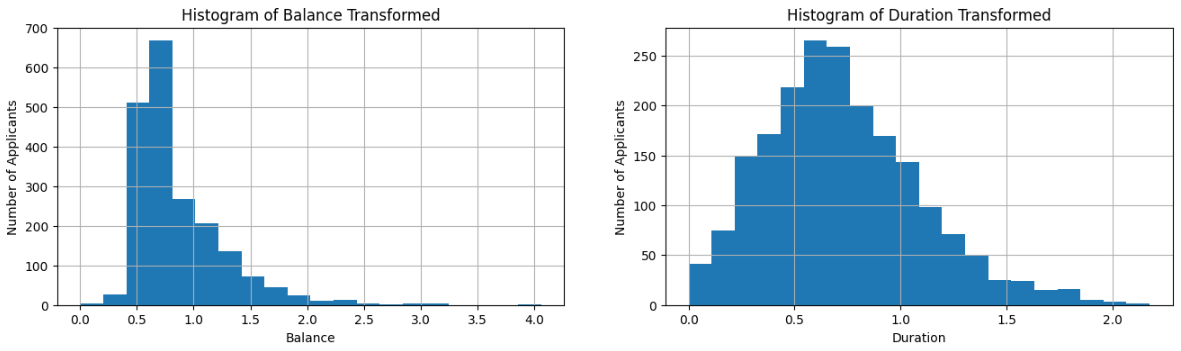

In [ ]:
df.to_csv('bank_prepared.csv')